# 大陆深证股票3000点缠绕策略

## 原理 
1. 目前内地因经济下行，长线看跌，有看跌方向做长期保障。
2. 大陆为宏观调控下的 市场经济，因此政策线将滞跌，使股票围绕政策先波动
3. 2与1就形成了 主观与客观的背离
4. 可围绕政策线做波动，但长期看跌

## 交易对象
股票

## 交易周期
D, M

## 交易指标
PPI CPI 人口老龄化率 通胀指数 股票涨跌率 政策线

## 风险控制

## 交易策略


In [1]:
# 中国 CPI 月率报告
import akshare as ak
macro_china_cpi_monthly_df = ak.macro_china_cpi_monthly()
print(macro_china_cpi_monthly_df)
print(macro_china_cpi_monthly_df.name)

1996-02-01    2.1
1996-03-01    2.3
1996-04-01    0.6
1996-05-01    0.7
1996-06-01   -0.5
             ... 
2023-08-09    0.2
2023-09-09    0.3
2023-10-13    0.2
2023-11-09   -0.1
2023-12-09   -0.5
Name: cpi, Length: 322, dtype: float64
cpi


In [2]:
#物流景气指数
macro_china_lpi_index_df = ak.macro_china_lpi_index()
print(macro_china_lpi_index_df)

             日期   最新值       涨跌幅    近3月涨跌幅    近6月涨跌幅     近1年涨跌幅    近2年涨跌幅  \
0    2013-07-01  52.4       NaN       NaN       NaN        NaN       NaN   
1    2013-08-01  52.9  0.954198       NaN       NaN        NaN       NaN   
2    2013-09-01  53.3  0.756144       NaN       NaN        NaN       NaN   
3    2013-10-01  53.6  0.562852  2.290076       NaN        NaN       NaN   
4    2013-11-01  53.0 -1.119403  0.189036       NaN        NaN       NaN   
..          ...   ...       ...       ...       ...        ...       ...   
121  2023-08-01  50.3 -1.178782 -2.330097  0.399202   8.639309  1.616162   
122  2023-09-01  53.5  6.361829  3.481625 -3.603604   5.731225  4.901961   
123  2023-10-01  52.9 -1.121495  3.929273 -1.672862   8.401639 -1.121495   
124  2023-11-01  53.3  0.756144  5.964215  3.495146  14.870690 -0.559701   
125  2023-12-01  53.5  0.375235  0.000000  3.481625  16.304348  1.711027   

       近3年涨跌幅  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4      

[(datetime.date(2022, 10, 10), 3024.391, 2974.145, -1), (datetime.date(2022, 10, 12), 2979.793, 3025.506, 1), (datetime.date(2022, 10, 24), 3038.929, 2977.555, -1), (datetime.date(2022, 11, 2), 2969.2, 3003.37, 1), (datetime.date(2022, 11, 3), 3003.37, 2997.806, -1), (datetime.date(2022, 11, 4), 2997.806, 3070.796, 1), (datetime.date(2023, 10, 20), 3005.393, 2983.059, -1), (datetime.date(2023, 10, 27), 2988.299, 3017.784, 1), (datetime.date(2023, 12, 5), 3022.914, 2972.296, -1), (datetime.date(2023, 12, 12), 2991.439, 3003.438, 1), (datetime.date(2023, 12, 13), 3003.438, 2968.761, -1)]


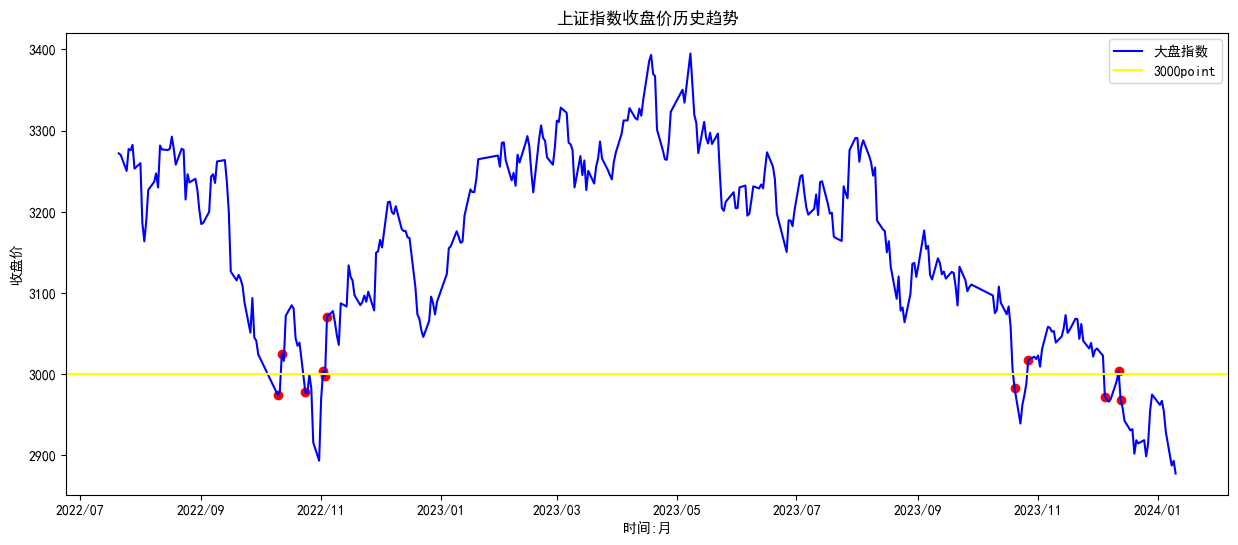

In [25]:
import akshare as ak
import numpy as np

# 取近30天指数
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import mpl
import matplotlib 


sh000001_close = ak.stock_zh_index_daily(symbol="sh000001")
end_index = sh000001_close.shape[0] - 360

sh000001_close = sh000001_close[end_index:]

# 获取大盘指数，转折点
def find_reverse_point(dates, line):
    reverse_point = []
    last_close = dates.iloc[0]['close']
    #print(last_close)
    for index, row in dates.iterrows():
        #print(row)
        curr_close = row['close']
        if last_close > line and curr_close < line:
            reverse_point.append((row['date'], last_close, curr_close, -1))
        if last_close < line and curr_close > line:
            reverse_point.append((row['date'], last_close, curr_close, 1))
        last_close = curr_close
    return reverse_point
    
    
reverse_points = find_reverse_point(sh000001_close, 3000)
reverse_marker_dates = []
reverse_marker_points = []
for reverse_point in reverse_points:
    reverse_marker_dates.append(reverse_point[0])
    reverse_marker_points.append(reverse_point[2])
    
print(reverse_points)
#print(reverse_marker)
#print(sh000001_close)
#print(reverse_marker_dates)
#print(reverse_marker_points)

mpl.rcParams['font.sans-serif']=['simhei']# 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['figure.figsize'] = (15.0, 6.0)
#print(type(sh000001_close))


plt.plot(sh000001_close['date'], sh000001_close['close'], label='大盘指数',color='blue')
plt.axhline(y=3000, label='3000point', color='yellow')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
#plt.gca().xaxis.set_major_locator(mdatesDayLocator())


#import akshare as ak



plt.scatter(reverse_marker_dates, reverse_marker_points, marker='o', color='red')

plt.title("上证指数收盘价历史趋势")
plt.xlabel('时间:月')
plt.ylabel('收盘价')
plt.legend()
plt.show()

             日期     开盘     收盘     最高     最低     成交量          成交额    振幅   涨跌幅  \
0    2022-09-01  23.03  23.56  24.10  23.02   35370   83874272.0  4.69  2.26   
1    2022-09-02  23.72  23.78  23.98  23.52   23153   55004737.0  1.95  0.93   
2    2022-09-05  23.79  23.60  23.99  23.55   16237   38455722.0  1.85 -0.76   
3    2022-09-06  23.68  24.17  24.38  23.59   25308   61029681.0  3.35  2.42   
4    2022-09-07  24.28  23.93  24.28  23.82   16676   39982446.0  1.90 -0.99   
..          ...    ...    ...    ...    ...     ...          ...   ...   ...   
325  2024-01-04  35.18  35.81  36.09  34.75   80191  284196648.0  3.81  1.79   
326  2024-01-05  35.63  35.08  36.07  34.92   62711  222889381.0  3.21 -2.04   
327  2024-01-08  34.87  35.08  35.38  34.58   48792  171223339.0  2.28  0.00   
328  2024-01-09  34.90  35.14  35.51  34.54   43564  152991601.0  2.77  0.17   
329  2024-01-10  34.66  31.63  34.66  31.63  219373  708590902.0  8.62 -9.99   

      涨跌额   换手率  
0    0.52  0.63  
1  

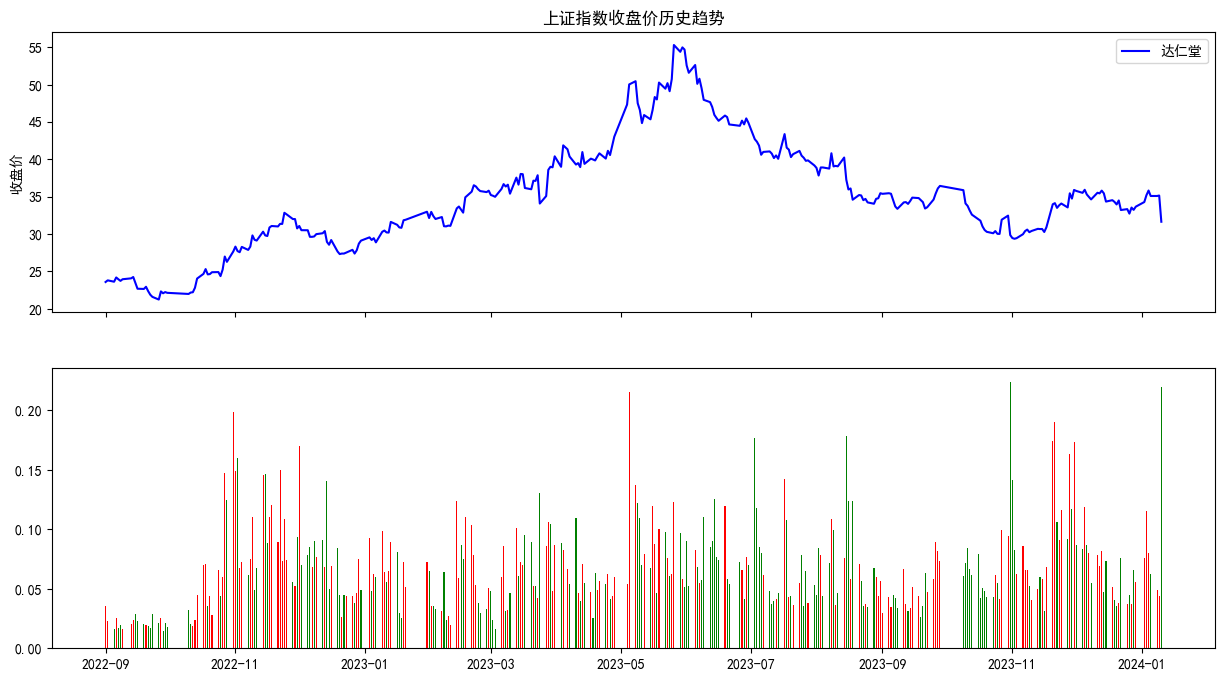

In [13]:
import akshare as ak
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import mpl
import matplotlib 
from mplfinance.original_flavor import candlestick2_ohlc

stock_sh_a_spot_em_df = ak.stock_sh_a_spot_em()

name = '达仁堂'
def name2code(name):
    stock_sh_a_spot_em_df = ak.stock_sh_a_spot_em()
    for index, row in stock_sh_a_spot_em_df.iterrows():
        if row['名称'] == name:
            return row['代码']
    return None


code = name2code(name)

stock_zh_a_hist_df = ak.stock_zh_a_hist(symbol=code, period="daily", start_date="20220901", end_date='20240110', adjust="")
df = stock_zh_a_hist_df
print(stock_zh_a_hist_df)
mpl.rcParams['font.sans-serif']=['simhei']# 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['figure.figsize'] = (15.0, 6.0)

figure,(axPrice, axVol) = plt.subplots(2, sharex=True, figsize=(15,8))
#candlestick2_ohlc(ax = axPrice,  opens=df["开盘"].values, closes=df["收盘"].values,highs=df["最高"].values, lows=df["最低"].values,width=0.75, colorup='red', colordown='green')
axPrice.plot(stock_zh_a_hist_df['日期'], stock_zh_a_hist_df['收盘'], label=name,color='blue')
axPrice.set_title("上证指数收盘价历史趋势")
#axPrice.set_xlabel('时间:月')
axPrice.set_ylabel('收盘价')
axPrice.legend()

for index, row in stock_zh_a_hist_df.iterrows():
    if(row['收盘'] >= row['开盘']):
        axVol.bar(row['日期'],row['成交量']/1000000,width = 0.5,color='red')
    else:    
        axVol.bar(row['日期'],row['成交量']/1000000,width = 0.5,color='green')
plt.show()